In [12]:
install.packages("tm")
install.packages("wordcloud")
install.packages("SnowballC")


The downloaded binary packages are in
	/var/folders/j9/d42th3yx55l116d3bn4z4mww0000gn/T//Rtmp4HegfU/downloaded_packages

The downloaded binary packages are in
	/var/folders/j9/d42th3yx55l116d3bn4z4mww0000gn/T//Rtmp4HegfU/downloaded_packages

The downloaded binary packages are in
	/var/folders/j9/d42th3yx55l116d3bn4z4mww0000gn/T//Rtmp4HegfU/downloaded_packages


In [13]:
library(tm)
library(wordcloud)
library(SnowballC)

In [14]:
sample.tennis = c("Oh, I absolutely love Roger, even he lost to Djokovic in IndianWells Yesterday.",
                  "Tennis! It must be love!", 
                  "USOpen tickets cost about 100 per ticket.",
                  "I love tennis I can  not lie! ")

<<DocumentTermMatrix (documents: 4, terms: 23)>>
Non-/sparse entries: 24/68
Sparsity           : 74%
Maximal term length: 11
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs absolutely djokovic even indianwells lost love love! oh, roger, yesterday.
   1          1        1    1           1    1    1     0   1      1          1
   2          0        0    0           0    0    0     1   0      0          0
   3          0        0    0           0    0    0     0   0      0          0
   4          0        0    0           0    0    1     0   0      0          0


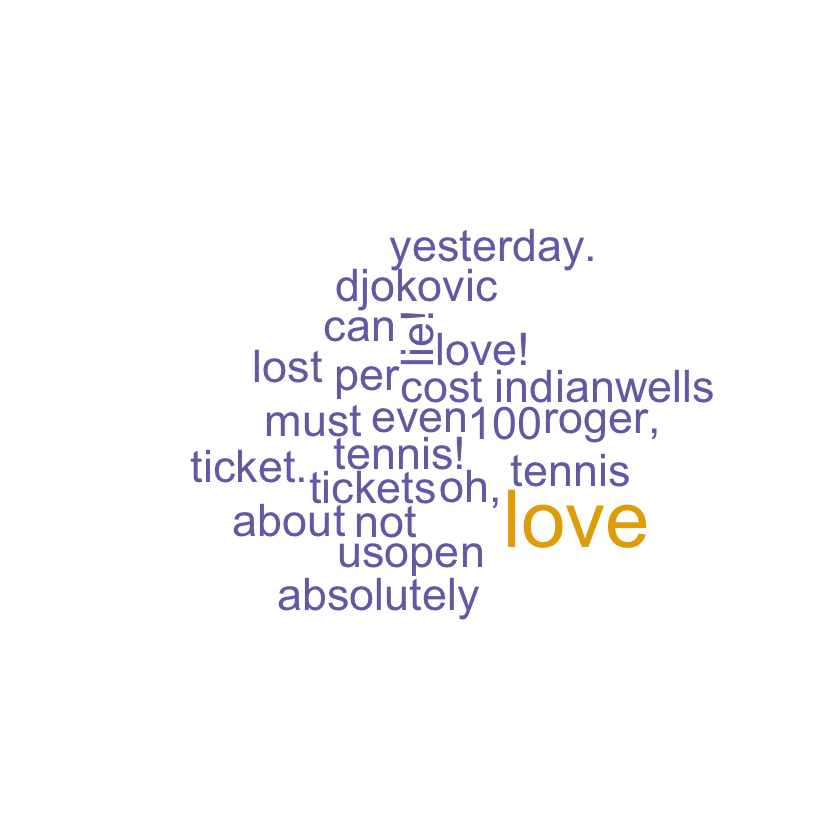

In [15]:
corp <- Corpus(VectorSource(sample.tennis))
tdm <- DocumentTermMatrix(corp)
inspect(tdm)
wordcloud(corp,  min.freq=25, color=brewer.pal(6, "Dark2")  ) 


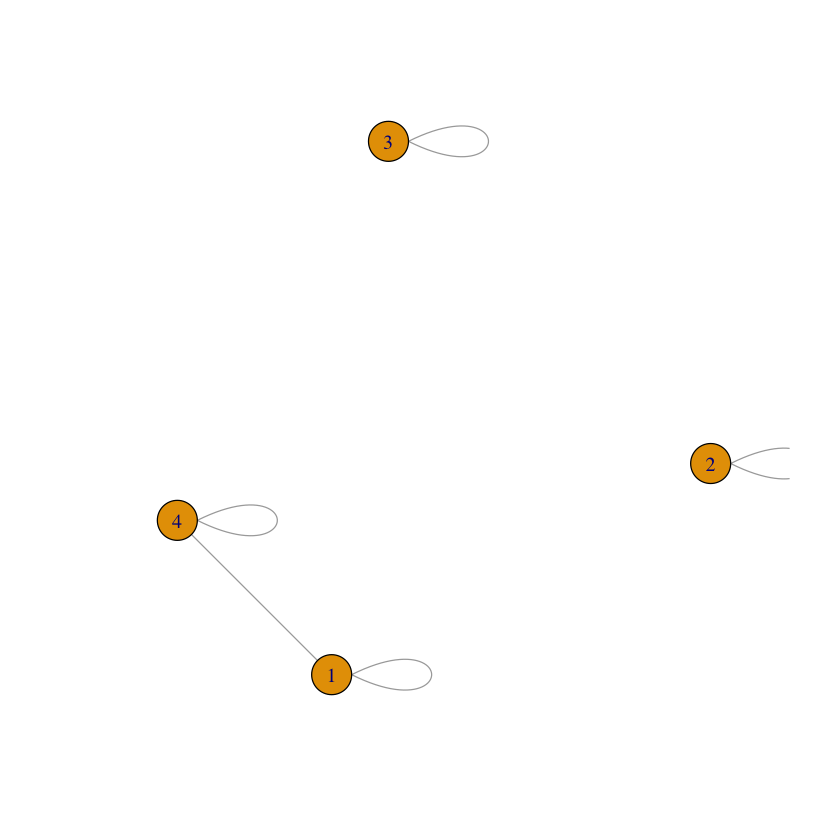

In [16]:
library(igraph)
tdm = as.matrix(tdm)
termMatrix <- tdm %*% t(tdm)
g <- graph.adjacency(termMatrix, weighted=T, mode = "undirected")
plot(g)

In [17]:
corp <- tm_map(corp, removePunctuation)   
corp <- tm_map(corp, removeNumbers)   
corp <- tm_map(corp, removeWords, stopwords("english"))   
corp <- tm_map(corp, stripWhitespace)   
library(SnowballC)  
corp <- tm_map(corp, stemDocument) 
corp <- tm_map(corp, content_transformer(tolower))
#corp <- tm_map(corp, PlainTextDocument)  #avoid tm 0.6 issue 

Warning message in tm_map.SimpleCorpus(corp, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corp, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corp, removeWords, stopwords("english")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corp, stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corp, stemDocument):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corp, content_transformer(tolower)):
“transformation drops documents”


Warning message in tm_map.SimpleCorpus(corp, removeWords, myStopwords):
“transformation drops documents”


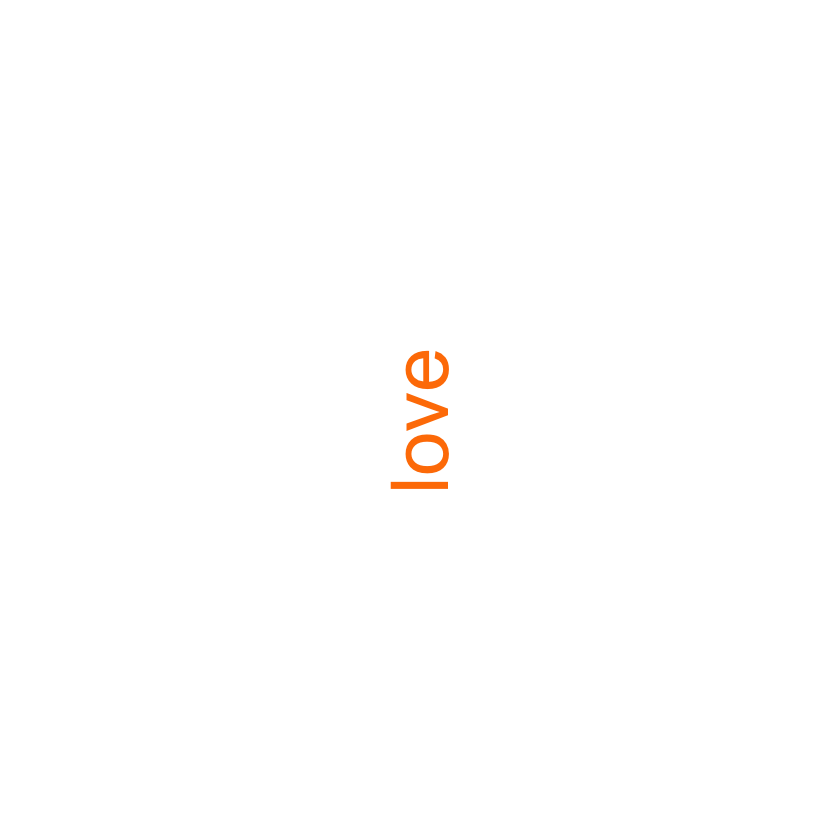

In [20]:
myStopwords <- c("can") 
myCorpus <- tm_map(corp, removeWords, myStopwords)
wordcloud(myCorpus, colors=brewer.pal(5,"Set1"),random.order=FALSE, max.words=50)
